<center>
# How to get some useful plots using the brightwind library
</center>
***

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 26 June, 2019


***
## Outline:

This guide will demonstrate how to use some of the plotting functions using the following steps:

- Import the brightwind library and some sample data
- Plot a time series of anemometer data for specific periods of interest
- Plot a scatter plot of two instruments
- Plot a scatter plot of two anemometers 
- Plot a scatter plot of two wind vanes
- Sector ratio plot

***

In [2]:
import brightwind as bw

In [3]:
# specify location of existing sample dataset
filepath = r'C:\...\brightwind\datasets\demo\demo_data.csv'
# load data as dataframe
data = bw.load_csv(filepath) 
# show first few rows of dataframe
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


### Plot a time series

First off we would like to plot a timeseries of each of the anemometers on the mast. To do this, we need to specify a python list with the column heading names of each of the average values of the anemometers. We then call the plot_timeseries function to plot the timeseries. 

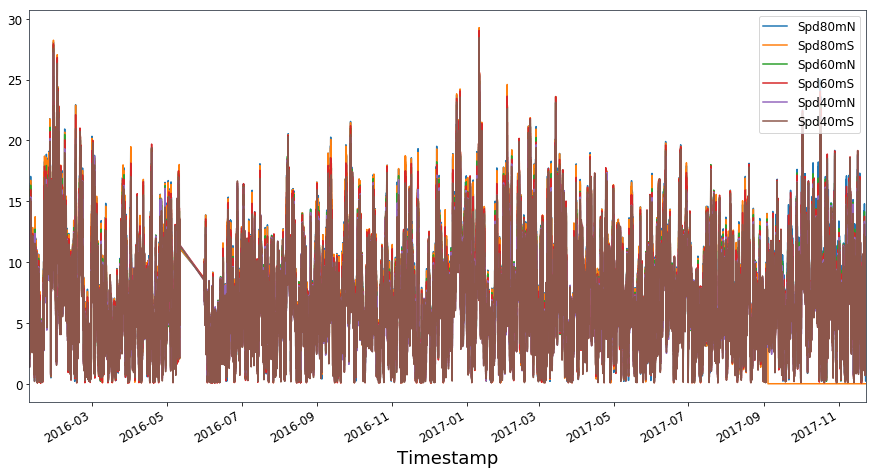

In [4]:
anemometers = ['Spd80mN','Spd80mS', 'Spd60mN', 'Spd60mS', 'Spd40mN', 'Spd40mS']
bw.plot_timeseries(data[anemometers])

The timeseries plotted above is very busy because we have displayed all of the data. Lets just take a look at a specific data range for a specific anemometer.

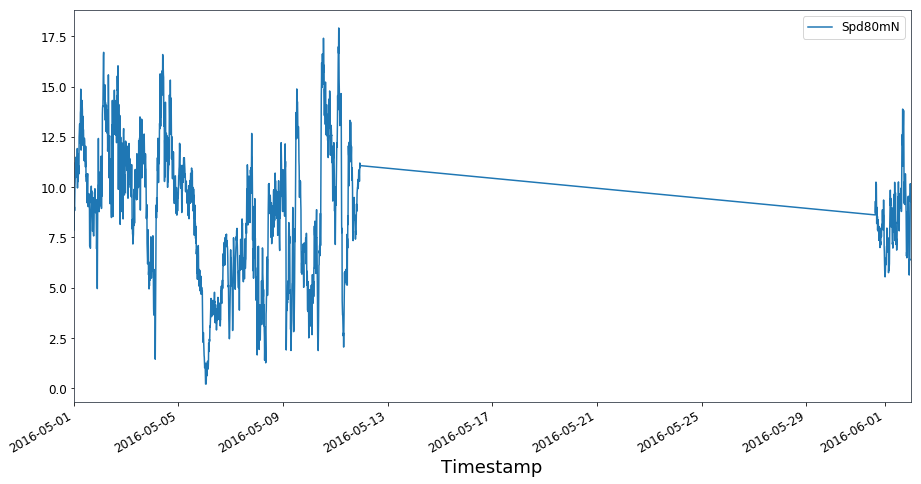

In [5]:
bw.plot_timeseries(data['Spd80mN']['2016-05-01':'2016-06-01'])

### Scatter plot of any two variables

The `plot_scatter()` function allows the user to plot any two variables from a dataframe against each other. In the example below we have plotted the temperature against the precipitation.

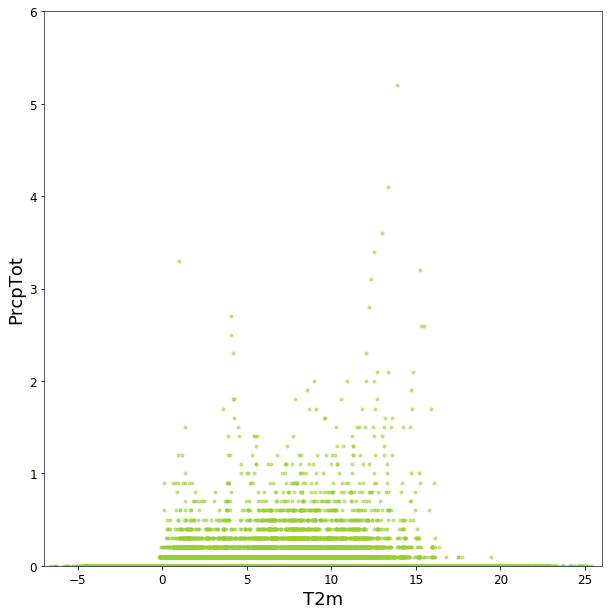

In [6]:
bw.plot_scatter(data.T2m,data.PrcpTot)

The graph could do with being improved by changing the x and y axis labels, and including some min and max y-limits. To this we use the variables x_axis_title, y_axis_title and y_limits.

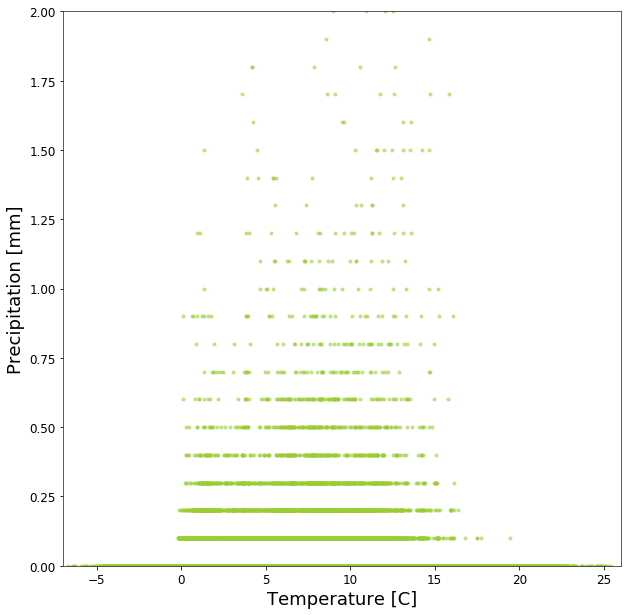

In [7]:
bw.plot_scatter(data.T2m,data.PrcpTot,x_axis_title='Temperature [C]',y_axis_title='Precipitation [mm]',y_limits=(0,2))

### Scatter plot of two anemometers

The brightwind library has been specifically designed with wind data in mind. So a special scatter plot function `plot_scatter_wspd()` for windspeed data was created to include a reference line, appropriate x and y limits and appropriate x and y labeling. 

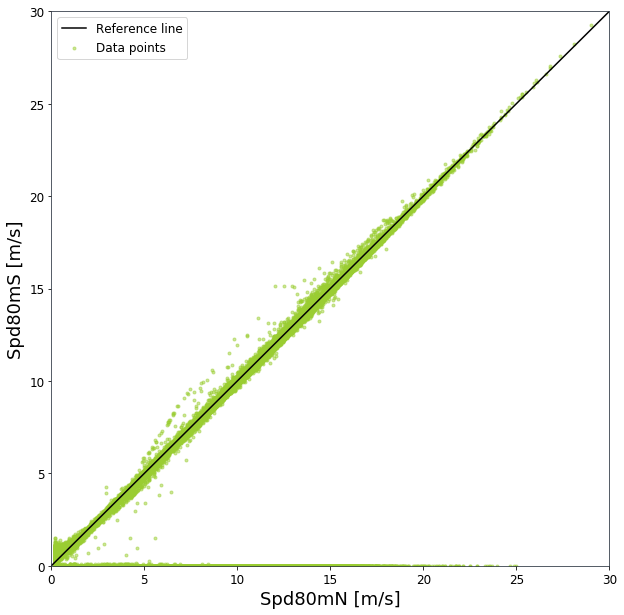

In [8]:
bw.plot_scatter_wspd(data.Spd80mN,data.Spd80mS)

### Scatter plot of two wind vanes

In addition, as plotting wind vanes in a scatter plot is a common requirement, a simple `plot_scatter_wdir()` function is included to allow two wind vanes to be plotted with appropriate reference line and x and y axis labels and limits. A unusual horizontal line can be seen in the data which originates from one of the wind vanes failing, and the output being fixed a constant value.

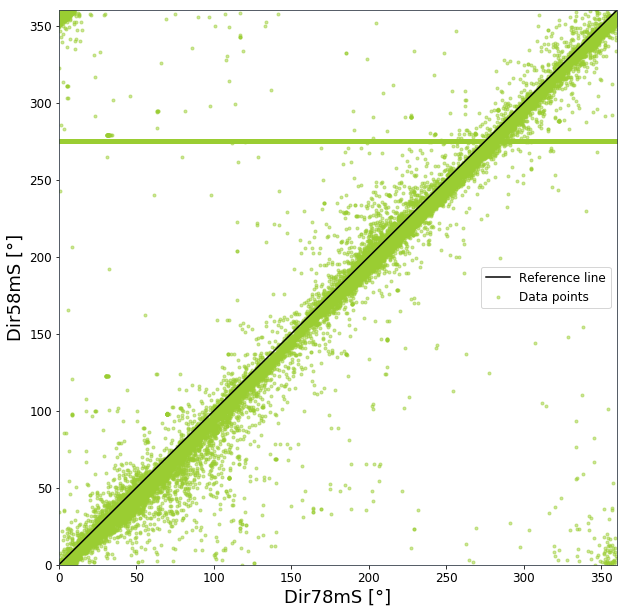

In [9]:
bw.plot_scatter_wdir(data.Dir78mS,data.Dir58mS)

### Sector Ratio Plot

A ratio plot of two separate anemometers mounted at the same height by direction is useful for understanding if the mounting arrangements of two anemometers are correct. Here we use the `sector_ratio()` function to plot the two 80m anemometers versus the 78m wind vane, and include the boom directions as variables so we can see them plotted on the polar plot.

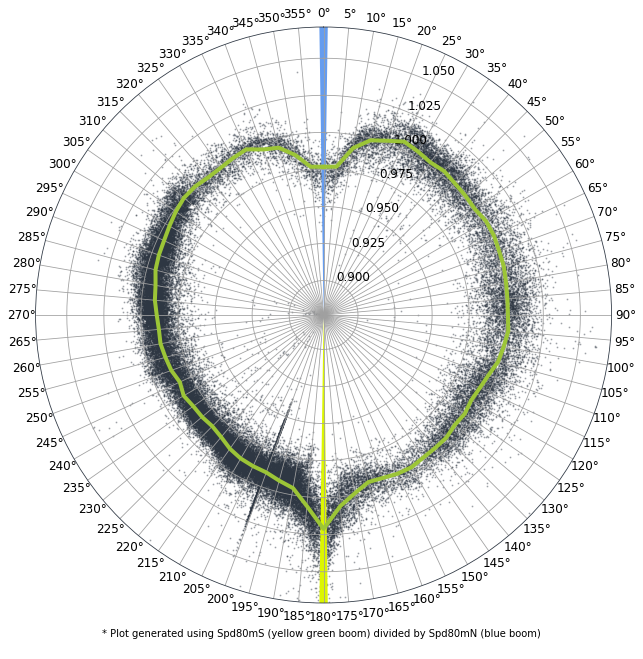

In [10]:
bw.sector_ratio(data.Spd80mN,data.Spd80mS,data.Dir78mS,boom_dir_1=0,boom_dir_2=180)